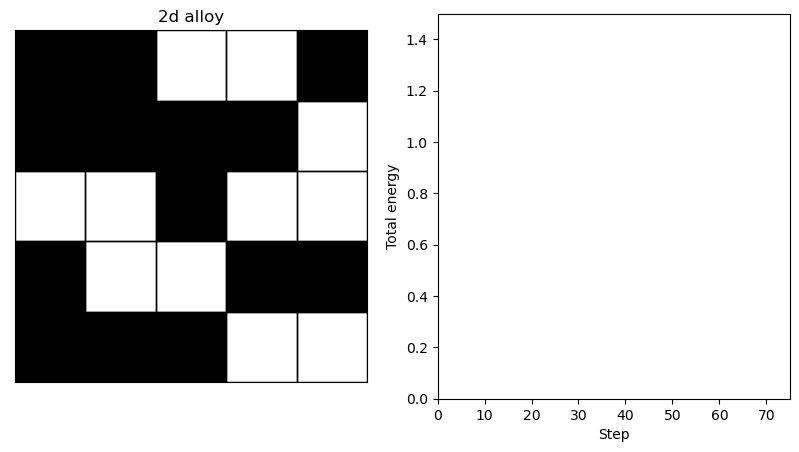

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
N_steps=0
total_energy = 0
grand_total_energy=-9999
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            c_energy = cluster_energy(translated_cluster, coefficient, occupancy)
            energy += c_energy 
            if c_energy != 0:
                N_steps += 1
    cluster_energies.append(energy)
    total_energy += energy
    if total_energy>grand_total_energy:
        grand_total_energy=total_energy


# Create plot
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10, 5))

# Define function to update plot
def update_plot(frame):
    counter=0
    ax1.clear()
    ax1.set_aspect("equal")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlim(0, nx)
    ax1.set_ylim(0, ny)
    ax1.set_title(f'2d alloy')
    
    ax2.clear()
    ax2.set_xlim(0,nx*nx*len(clusters))
    ax2.set_ylim(0,grand_total_energy)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Total energy")
    
    for i in range(nx):
        for j in range(ny):
            xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
            color = "k" if occupancy[i, j] else "none"
            poly = Polygon(xy, facecolor=color, edgecolor="k")
            ax1.add_patch(poly)

    total_energy = 0
    energy_list = []
    N=0
    for cluster, coefficient in clusters:
        for i in range(nx):
            for j in range(ny):
                # Translate cluster to current position and calculate energy
                translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
                energy = cluster_energy(translated_cluster, coefficient, occupancy)
                total_energy += energy
                energy_list.append(total_energy)
                counter +=1
                if energy !=0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "b"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)
                if energy ==0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "r"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)

    ax2.plot(range(frame), energy_list[0:frame], 'b-')

# Create animation
animation = FuncAnimation(fig, update_plot, frames=nx*ny*len(clusters), interval=100)


# Display animation
HTML(animation.to_jshtml())

animation.save('CE.gif', writer = 'pillow', fps=1)

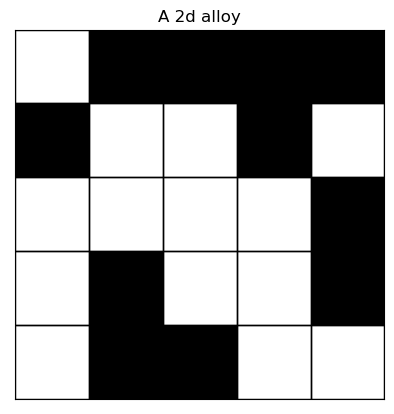

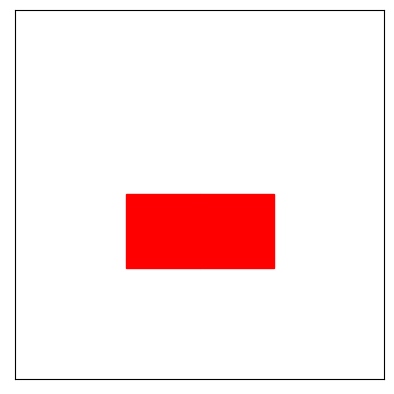

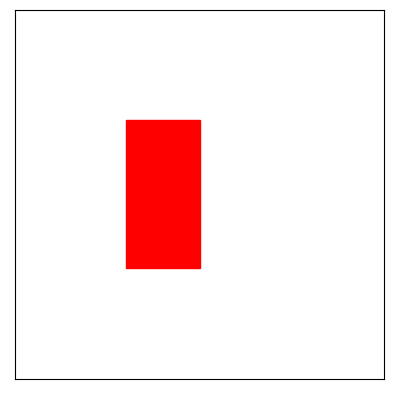

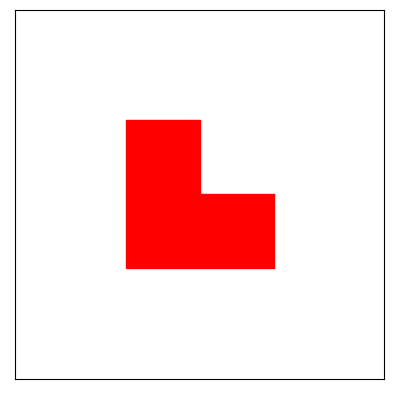

True total energy:  0.9  Your guess? 1.2
Cluster 1 energy: 0.4
Cluster 2 energy: 0.6000000000000001
Cluster 3 energy: -0.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
total_energy = 0
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            energy += cluster_energy(translated_cluster, coefficient, occupancy)
    cluster_energies.append(energy)
    total_energy += energy

# Plot the lattice without clusters marked out
fig, ax  = plt.subplots(1,4)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])
for i in range(nx):
    for j in range(ny):
        xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
        color = "k" if occupancy[i, j] else "none"
        poly = Polygon(xy, facecolor=color, edgecolor="k")
        ax.add_patch(poly)
ax.set_xlim(0, nx)
ax.set_ylim(0, ny)
ax.set_title("A 2d alloy")
plt.show()

# Plot each cluster individually
for i, (cluster, coefficient) in enumerate(clusters):
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    for site in cluster:
        x, y = site[0]+nx/2.-1, site[1]+ny/2.-1
        xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
        color = "r"
        poly = Polygon(xy, facecolor=color, edgecolor="r")
        ax.add_patch(poly)
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)
    plt.show()

E_guess = input("The energy of the system is defined by the number of cluster of each type that you can fit over black pathes of the alloy. What is the expected energy of the system?")


# Print total energy and cluster energies
print("True total energy: ", total_energy," Your guess?",E_guess)
for i, energy in enumerate(cluster_energies):
    print("Cluster {} energy: {}".format(i+1, energy))


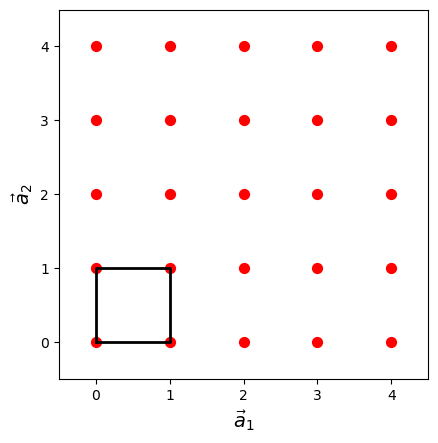

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice dimensions
nx, ny = 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Define the unit cell
unit_cell = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Plot the lattice
fig, ax = plt.subplots()
ax.scatter(X, Y, c='r', marker='o', s=50)
ax.plot(unit_cell[:, 0], unit_cell[:, 1], color='k', linewidth=2)
ax.set_xlim(-0.5, nx-0.5)
ax.set_ylim(-0.5, ny-0.5)

ax.set_xlabel(r'$\vec{a}_1$',fontsize=14)
ax.set_ylabel(r'$\vec{a}_2$',fontsize=14)
ax.set_aspect('equal')
plt.show()

In [ ]:
# Define lattice dimensions
nx, ny, nz = 5, 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
z = np.arange(nz)
X, Y, Z = np.meshgrid(x, y, z)

# Plot the lattice
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='b', marker='o', edgecolor='k',s=150)

ax.set_xlabel(r'$\vec{a}_1$',fontsize=14)
ax.set_ylabel(r'$\vec{a}_2$',fontsize=14)
ax.set_zlabel(r'$\vec{a}_3$',fontsize=14)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice dimensions
nx, ny = 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Define clusters
clusters = [
    [[0, 0], [1, 0], [1, 1]],
    [[0, 3], [1, 3] ],
    [[2, 2], [3, 2], [3, 3], [4,3]]
]

# Plot the lattice
fig, ax = plt.subplots()
ax.scatter(X, Y, c='lightgray', marker='o', s=50, zorder=0)

# Highlight the clusters
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for j in range(len(cluster)-1):
        x, y = cluster[j]
        x2, y2 = cluster[j+1]
        if x == x2 or y == y2:  # check if line segment is vertical or horizontal
            ax.plot([x, x2], [y, y2], color=colors[i], linewidth=3, zorder=1)

ax.set_xlim(-0.5, nx-0.5)
ax.set_ylim(-0.5, ny-0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.show()

33554432

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
N_steps=0
total_energy = 0
grand_total_energy=-9999
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            c_energy = cluster_energy(translated_cluster, coefficient, occupancy)
            energy += c_energy 
            if c_energy != 0:
                N_steps += 1
    cluster_energies.append(energy)
    total_energy += energy
    if total_energy>grand_total_energy:
        grand_total_energy=total_energy


# Create plot
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10, 5))

# Define function to update plot
def update_plot(frame):
    counter=0
    ax1.clear()
    ax1.set_aspect("equal")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlim(0, nx)
    ax1.set_ylim(0, ny)
    ax1.set_title(f'2d alloy')
    
    ax2.clear()
    ax2.set_xlim(0,nx*nx*len(clusters))
    ax2.set_ylim(0,grand_total_energy)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Total energy")
    
    for i in range(nx):
        for j in range(ny):
            xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
            color = "k" if occupancy[i, j] else "none"
            poly = Polygon(xy, facecolor=color, edgecolor="k")
            ax1.add_patch(poly)

    total_energy = 0
    energy_list = []
    N=0
    for cluster, coefficient in clusters:
        for i in range(nx):
            for j in range(ny):
                # Translate cluster to current position and calculate energy
                translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
                energy = cluster_energy(translated_cluster, coefficient, occupancy)
                total_energy += energy
                energy_list.append(total_energy)
                counter +=1
                if energy !=0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "b"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)
                if energy ==0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "r"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)

    ax2.plot(range(frame), energy_list[0:frame], 'b-')

# Create animation
animation = FuncAnimation(fig, update_plot, frames=nx*ny*len(clusters), interval=100)


# Display animation
HTML(animation.to_jshtml())

animation.save('CE.gif', writer = 'pillow', fps=1)